In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.linalg

In [2]:
c = 10
m1 = 5
m2 = 3

T = 0.1

In [3]:
A = np.array([[0, -1/m1*c, 0, 1/m1*c],
             [1, 0, 0, 0],
             [0, 1/m2*c, 0, -1/m2*c],
             [0, 0, 1, 0]])

B = np.array([[1/m1],[0],[0],[0]])

In [4]:
A

array([[ 0.        , -2.        ,  0.        ,  2.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.33333333,  0.        , -3.33333333],
       [ 0.        ,  0.        ,  1.        ,  0.        ]])

In [5]:
B

array([[0.2],
       [0. ],
       [0. ],
       [0. ]])

In [6]:
blocked = np.zeros((5, 5))
blocked[:4, :4] = A
blocked[:4, 4:] = B

In [7]:
blocked

array([[ 0.        , -2.        ,  0.        ,  2.        ,  0.2       ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.33333333,  0.        , -3.33333333,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [8]:
exp_blocked = scipy.linalg.expm(blocked*T)

Ad = exp_blocked[:4, :4]
Bd = exp_blocked[:4, 4:]

In [9]:
steps = 400

F = np.sin(np.linspace(0, 10, steps))

In [10]:
x0 = np.zeros((4, 1))

In [11]:
X = np.zeros((4, steps+1))

In [12]:
for i in range(steps):
    X[:, i+1] = (Ad@X[:, i].reshape((4,1)) + (Bd*F[i])).flatten()

In [13]:
Ad@X[:, i].reshape((4,1)) + (Bd*F[i])

array([[ 0.91227964],
       [21.02096338],
       [ 0.91630401],
       [21.03822968]])

In [14]:
(Bd * F[i])

array([[-1.08442507e-02],
       [-5.43116019e-04],
       [-6.02858032e-05],
       [-1.50848579e-06]])

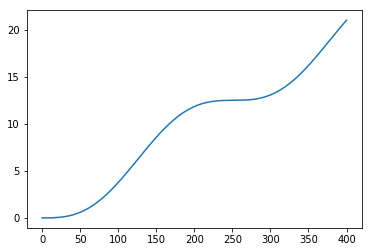

In [15]:
plt.plot(X[1, :])
plt.show()

In [16]:
import cvxpy as cvx

In [17]:
slack = cvx.Variable(1)

In [18]:
states = cvx.Variable(4, steps+1)
forces = cvx.Variable(1, steps)

In [19]:
constraints = []

In [20]:
# starting state as constraint
starting_state = np.array([0, 1, 0, 1])

constraints.append(states[:, 0] == starting_state)

In [21]:
# state transitions as constraint
for t in range(steps):
    constraints.append(states[:, t+1] == Ad*states[:, t] + Bd*forces[:, t])

In [22]:
# positions never below 0
constraints.append(states[1, :] > 0)
constraints.append(states[3, :] > 0)

In [23]:
objective = cvx.Minimize(cvx.sum_squares(states) + cvx.sum_squares(forces))

In [24]:
problem = cvx.Problem(objective, constraints)

In [25]:
problem.solve()

72.32014223466595

In [26]:
problem.status

'optimal'

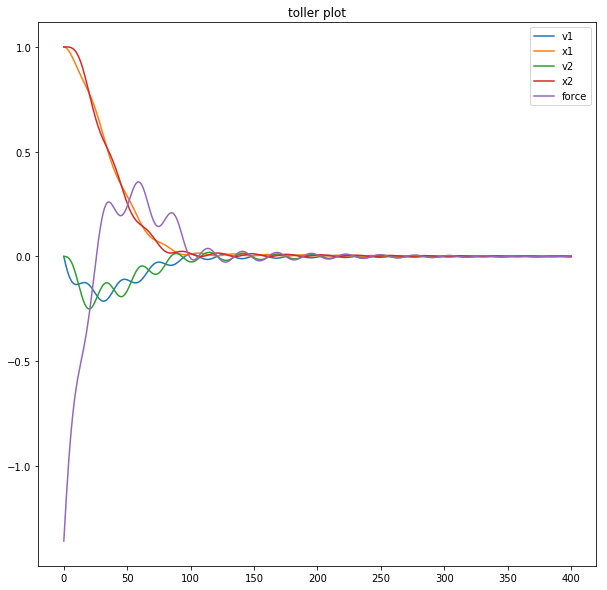

In [27]:
plt.figure(figsize=(10,10))
plt.title("toller plot")
plt.plot(states.value.T)
plt.plot(forces.value.T)
plt.legend(["v1", "x1", "v2", "x2", "force"])
plt.show()